# NSRDB and Naïve Model for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3_data_download/

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

A simple normalization procedure is then used to convert the Global Horizontal Irradiance (GHI) to power output.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.nsrdb import naive
from prereise.gather.solardata.helpers import to_reise

import getpass
from matplotlib import pyplot

## 1. Solar plants in Network

In [2]:
grid = Grid(['Western'])
solar_plant = grid.plant.groupby('type').get_group('solar')

--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,GenFuelCost,GenIOB,GenIOC,GenIOD,type,interconnect,lat,lon,zone_id,zone_name
plant_id,,,,,,,,,,,,,,,,,,,,,
10441,2010760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0.0,0.0,0.0,0,solar,Western,45.584722,-122.405600,201,Washington
10447,2010776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0.0,0.0,0.0,0,solar,Western,48.448100,-122.433100,201,Washington
10448,2010776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0.0,0.0,0.0,0,solar,Western,48.448100,-122.433100,201,Washington
10451,2010782,13.43,0.0,0.0,0.0,1.0156,27.32,1,13.43,13.43,...,0.0,0.0,0.0,0,solar,Western,46.103887,-122.918429,201,Washington
10452,2010782,14.65,0.0,0.0,0.0,1.0156,18.63,1,14.65,14.65,...,0.0,0.0,0.0,0,solar,Western,46.103887,-122.918429,201,Washington


In [4]:
print("There are %d solar plants in the Western grid." % len(solar_plant))

There are 391 solar plants in the Western grid.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key.

In [5]:
email = getpass.getpass(prompt='email=')
key = getpass.getpass(prompt='api_key=')
data = naive.retrieve_data(solar_plant, email, key)

email=········
api_key=········


100%|██████████| 150/150 [08:48<00:00,  3.72s/it]


In [6]:
data.tail(n=20)

,Pout,plant_id,ts,ts_id
3434524,0.035244,12303,2016-12-31 23:00:00,8784
3434525,0.258974,12376,2016-12-31 23:00:00,8784
3434526,0.153846,12377,2016-12-31 23:00:00,8784
3434527,0.128205,12378,2016-12-31 23:00:00,8784
3434528,0.096154,12379,2016-12-31 23:00:00,8784
3434529,0.238139,12399,2016-12-31 23:00:00,8784
3434530,0.036496,12400,2016-12-31 23:00:00,8784
3434531,0.139599,12401,2016-12-31 23:00:00,8784
3434532,0.456985,12512,2016-12-31 23:00:00,8784
3434533,0.384191,12513,2016-12-31 23:00:00,8784


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
data_oneplant = data[data.plant_id == 12400]

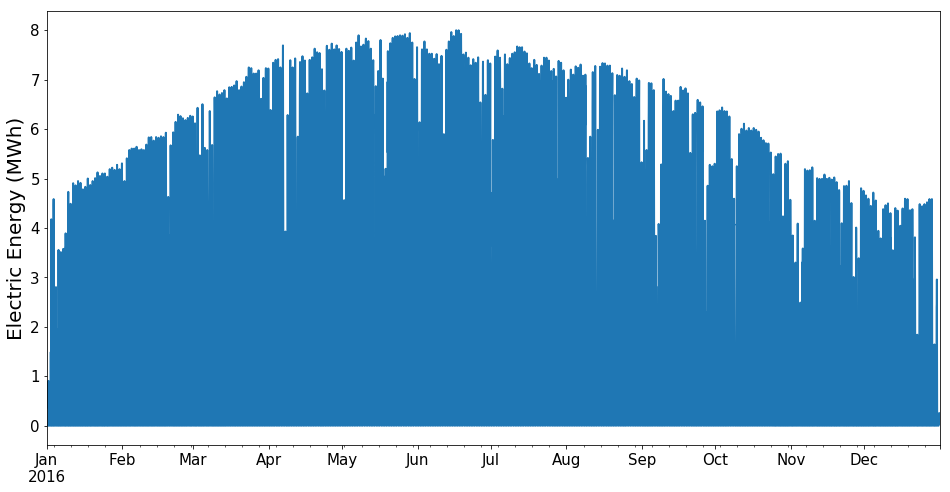

In [8]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

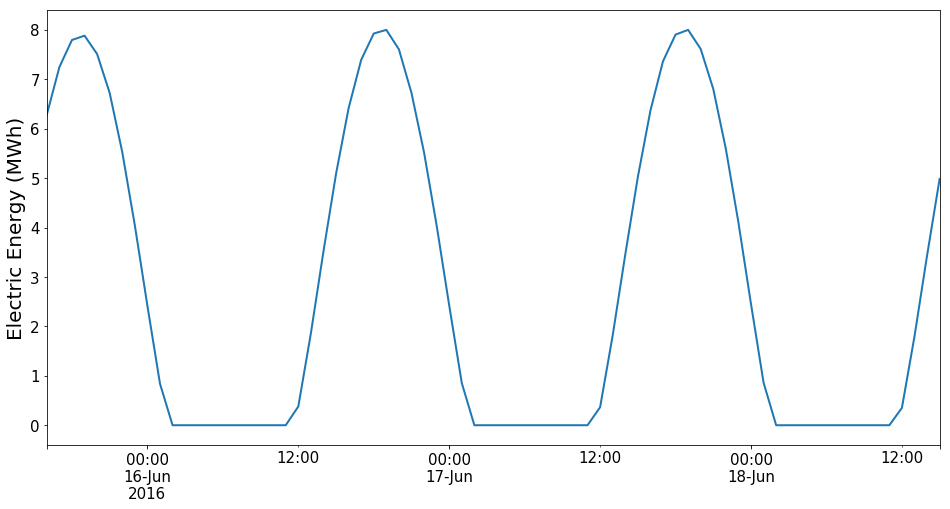

In [9]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[4000:4072].plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

## 4. Format Data
Data are formated for REISE

In [10]:
data_reise = to_reise(data)

In [11]:
data_reise.tail()

,10441,10447,10448,10451,10452,10453,10454,10455,10456,10457,...,12514,12515,12516,12675,12676,12677,12678,12753,12754,12874
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,22.450362,8.278775,5.913411,6.463799,6.463799,6.463799,11.477754,16.954450,11.477754,11.477754,...,14.917280,17.403492,4.723805,17.539447,3.739754,3.739754,17.539447,7.988572,7.056571,3.435484
2016-12-31 20:00:00,23.022751,8.544879,6.103485,6.656174,6.656174,6.656174,11.895127,17.570975,11.895127,11.895127,...,13.345589,15.569853,4.226103,17.155021,3.657787,3.657787,17.155021,7.594286,6.708285,3.125806
2016-12-31 21:00:00,20.288004,7.598733,5.427666,5.886674,5.886674,5.886674,10.559534,15.598094,10.559534,10.559534,...,10.229780,11.934742,3.239430,14.223771,3.032787,3.032787,14.223771,6.222857,5.496857,2.467742
2016-12-31 22:00:00,14.564116,5.351637,3.822598,4.251487,4.251487,4.251487,7.387500,10.912500,7.387500,7.387500,...,5.845588,6.819853,1.851103,9.178176,1.956967,1.956967,9.178176,4.028572,3.558571,1.548387
2016-12-31 23:00:00,6.995864,2.247096,1.605069,2.058412,2.058412,2.058412,3.046822,4.500636,3.046822,3.046822,...,1.213235,1.415441,0.384191,3.027357,0.645492,0.645492,3.027357,1.388571,1.226571,0.512903
